## Importing the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nl
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import Counter
import itertools
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'nltk'

## Reading the data

In [ ]:
flipkart_data=pd.read_csv("C:\\Users\\Dell Latitude 3410\\Downloads\\Dataset-SA.csv\\Dataset-SA.csv")

## Cleaning the data

In [ ]:
flipkart_data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
flipkart_data.tail()

,product_name,product_price,Rate,Review,Summary,Sentiment
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive
205051,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,value-for-money,very good but mixing bowl not included is one ...,neutral


In [ ]:
flipkart_data.sample(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
20952,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1349,4,nice product,super quality within this price range even it ...,positive
83967,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,86990,5,classy product,bought a macbook air 6 months ago working very...,negative
58416,288SDTL TIMEWEAR Silver Pink Dial Stainless St...,339,5,NaN,great watch must go for it,positive
29832,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,terrific purchase,best product,positive
62607,Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...,218,5,must buy!,super,positive
55867,Men Graphic Print Round Neck Black T-Shirt,269,5,NaN,nice products thank you flipkart,positive
169648,Gojeeva Wooden Hanging Lamp suitable for Livin...,599,4,really nice,value for money it really looks good after fit...,positive
49803,Men Solid Single Breasted Casual Blazer??????(...,1819,2,NaN,not up to the mark,neutral
3227,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",1999,5,fabulous!,i will say in one word it is fantastic awesome...,positive
24104,PHILIPS HR7627/00 650 W Food Processor????????...,4319,5,terrific,excellent product,positive


In [ ]:
flipkart_data.shape
print(f'The dataset has {flipkart_data.shape[0]} number of rows and {flipkart_data.shape[1]} number of columns.')

The dataset has 205052 number of rows and 6 number of columns.


In [ ]:
flipkart_data.index

RangeIndex(start=0, stop=205052, step=1)

In [ ]:
flipkart_data.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [ ]:
flipkart_data['product_name'].nunique()

958

In [ ]:
flipkart_data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [ ]:
flipkart_data.isnull().any()

product_name     False
product_price    False
Rate             False
Review            True
Summary           True
Sentiment        False
dtype: bool

In [ ]:
flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
# Convert 'product_price' to numeric (remove non-numeric characters if needed)
flipkart_data['product_price'] = flipkart_data['product_price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [ ]:
# Convert 'Rate' to numeric
flipkart_data['Rate'] = pd.to_numeric(flipkart_data['Rate'], errors='coerce')

In [ ]:
# Drop rows where both 'Review' and 'Summary' are missing
flipkart_data = flipkart_data.dropna(subset=['Review', 'Summary'], how='all')

In [ ]:
# Drop rows where both 'Review' and 'Summary' are missing
flipkart_data = flipkart_data.dropna(subset=['Review', 'Summary'], how='all')

In [ ]:
# Fill missing 'Review' with 'Summary' and vice versa if one exists
flipkart_data['Review'] = flipkart_data['Review'].fillna(flipkart_data['Summary'])
flipkart_data['Summary'] =flipkart_data['Summary'].fillna(flipkart_data['Review'])

In [ ]:
# Remove special characters from 'product_name'
flipkart_data['product_name'] = flipkart_data['product_name'].str.replace(r'[^\w\s]', '', regex=True)

In [ ]:
# Check the cleaned dataset
flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205050 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_name   205050 non-null  object 
 1   product_price  205050 non-null  float64
 2   Rate           205047 non-null  float64
 3   Review         205050 non-null  object 
 4   Summary        205050 non-null  object 
 5   Sentiment      205050 non-null  object 
dtypes: float64(2), object(4)
memory usage: 11.0+ MB


In [ ]:
flipkart_data.head()


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999.0,5.0,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999.0,5.0,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999.0,3.0,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999.0,1.0,useless product,very bad product its a only a fan,negative
4,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999.0,3.0,fair,ok ok product,neutral


## Data Visualization

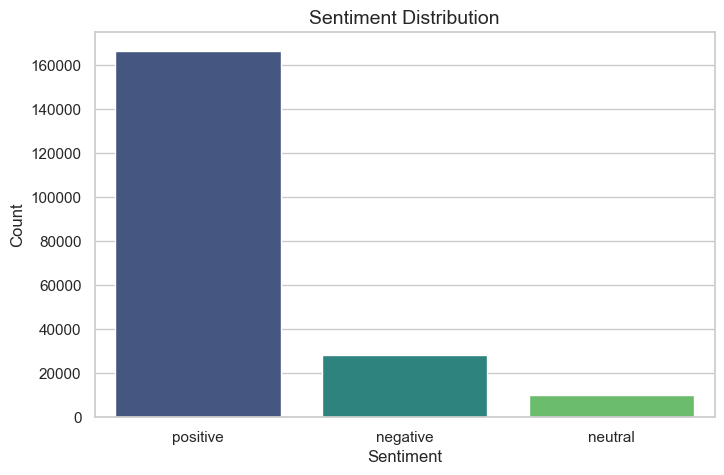

In [ ]:
# Set style
sns.set(style="whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=flipkart_data, x='Sentiment', order=flipkart_data['Sentiment'].value_counts().index, palette="viridis")
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

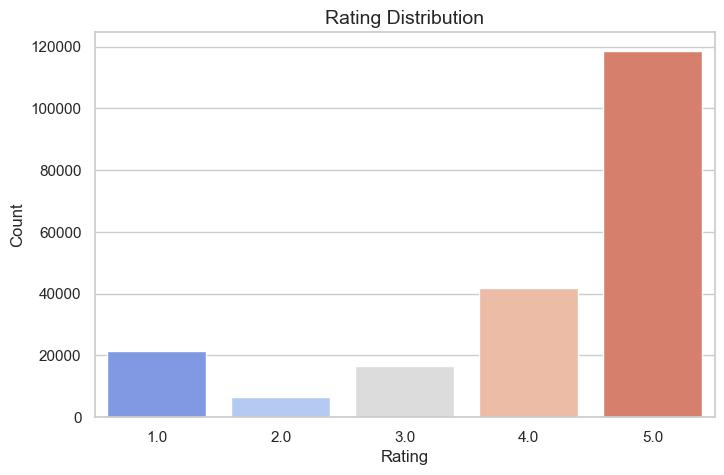

In [ ]:
# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=flipkart_data, x='Rate', palette="coolwarm")
plt.title("Rating Distribution", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

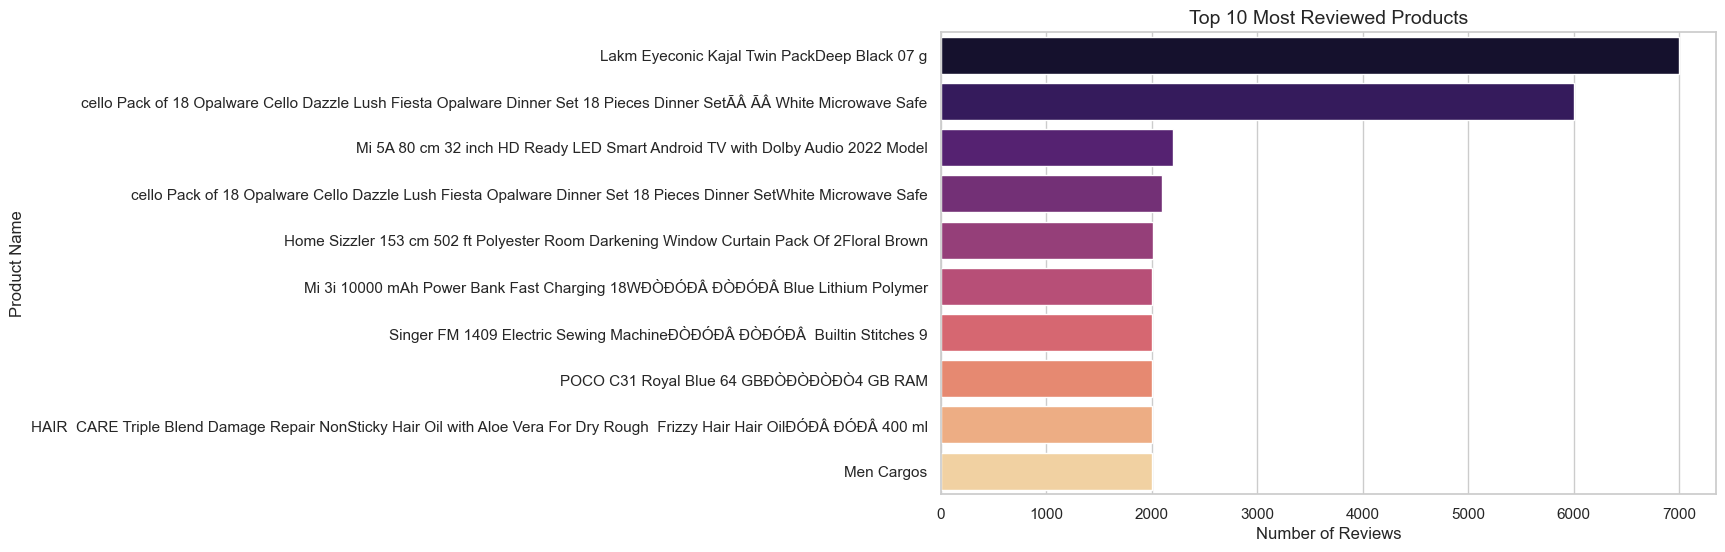

In [ ]:
# Top 10 most reviewed products
top_products = flipkart_data['product_name'].value_counts().head(10)

# Plot most reviewed products
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="magma")
plt.title("Top 10 Most Reviewed Products", fontsize=14)
plt.xlabel("Number of Reviews", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()


## Doing Natural Language Processing

In [ ]:
# Download stopwords if not available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Dell Latitude
[nltk_data]     3410\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Dell Latitude
[nltk_data]     3410\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define stopwords and preprocessing function
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    words = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric
    return words

In [ ]:
# Apply preprocessing to reviews
flipkart_data['processed_review'] = flipkart_data['Review'].astype(str).apply(preprocess_text)

In [ ]:
# Faster aggregation using itertools.chain()
positive_reviews = list(itertools.chain.from_iterable(flipkart_data.loc[flipkart_data['Sentiment'] == 'positive', 'processed_review']))
negative_reviews = list(itertools.chain.from_iterable(flipkart_data.loc[flipkart_data['Sentiment'] == 'negative', 'processed_review']))

In [ ]:
# Count word frequencies
pos_word_freq = Counter(positive_reviews)
neg_word_freq = Counter(negative_reviews)

In [ ]:
pos_word_freq

Counter({'product': 29398,
         'good': 22531,
         'nice': 13744,
         'awesome': 11690,
         'purchase': 10772,
         'terrific': 10707,
         'worth': 8925,
         'wonderful': 8744,
         'specified': 6680,
         'super': 6398,
         'best': 6192,
         'excellent': 5894,
         'great': 5816,
         'buy': 5777,
         'perfect': 5734,
         'quality': 5684,
         'must': 5584,
         'wow': 5526,
         'classy': 5519,
         'brilliant': 5508,
         'every': 5489,
         'penny': 5477,
         'recommended': 5473,
         'simply': 5468,
         'fabulous': 5445,
         'market': 5441,
         'highly': 5411,
         'money': 3854,
         'really': 3617,
         'choice': 3349,
         'delightful': 3340,
         'pretty': 3284,
         'decent': 1333,
         'job': 1307,
         'fair': 1255,
         'okay': 1213,
         'price': 797,
         'comfortable': 639,
         'flipkart': 582,
         'li

In [ ]:
neg_word_freq

Counter({'product': 4348,
         'money': 2512,
         'waste': 2397,
         'good': 2182,
         'quality': 2174,
         'bad': 1909,
         'disappointed': 1787,
         'poor': 1534,
         'worst': 1336,
         'better': 1229,
         'specified': 1171,
         'rubbish': 1157,
         'absolute': 1155,
         'terrible': 1152,
         'utterly': 1135,
         'worthless': 1121,
         'ever': 1105,
         'experience': 1103,
         'expectations': 1094,
         'hated': 1093,
         'meet': 1090,
         'recommended': 1085,
         'useless': 1064,
         'unsatisfactory': 1056,
         'horrible': 1039,
         'expected': 683,
         'nice': 653,
         'moderate': 634,
         'slightly': 620,
         'way': 570,
         'could': 568,
         'fair': 448,
         'okay': 408,
         'job': 404,
         'decent': 403,
         'dont': 292,
         'buy': 275,
         'low': 191,
         'worth': 183,
         'size': 168,
  

In [ ]:
# Define a basic stopwords list manually
manual_stopwords = set([
    "the", "a", "an", "in", "on", "at", "is", "it", "this", "that", "to", "for", "with", "was", "as", "of", "and", "or", "by", "from", "you", "i", "he", "she", "they", "we", "me", "my", "your", "our", "their", "its", "but", "so", "if", "then", "out", "up", "down"
])

In [ ]:
# Function for text cleaning and tokenization
def preprocess_text_alternative(text):
    text = text.lower()  # Convert to lowercase
    words = re.findall(r'\b\w+\b', text)  # Extract words
    words = [word for word in words if word not in manual_stopwords]  # Remove stopwords
    return words

In [ ]:
# Apply preprocessing
flipkart_data['processed_review'] = flipkart_data['Review'].astype(str).apply(preprocess_text_alternative)

In [ ]:
flipkart_data['processed_review'] 

0                    [super]
1                  [awesome]
2                     [fair]
3         [useless, product]
4                     [fair]
                 ...        
205047           [must, buy]
205048               [super]
205049                [nice]
205050           [just, wow]
205051        [value, money]
Name: processed_review, Length: 205050, dtype: object

In [ ]:
from itertools import chain
from collections import Counter

# Convert processed_review to lists (in case it's a Series of lists)
flipkart_data['processed_review'] = flipkart_data['processed_review'].apply(lambda x: x if isinstance(x, list) else [])

# Efficiently flatten and count words
positive_reviews = Counter(chain.from_iterable(flipkart_data.loc[flipkart_data['Sentiment'] == 'positive', 'processed_review']))
negative_reviews = Counter(chain.from_iterable(flipkart_data.loc[flipkart_data['Sentiment'] == 'negative', 'processed_review']))

# Display top 10 most common words in each sentiment
print("Top Positive Words:", positive_reviews.most_common(10))
print("Top Negative Words:", negative_reviews.most_common(10))

Top Positive Words: [('product', 29398), ('good', 22532), ('nice', 13744), ('awesome', 11691), ('purchase', 10772), ('terrific', 10707), ('worth', 8926), ('wonderful', 8745), ('not', 7354), ('money', 6994)]
Top Negative Words: [('not', 5274), ('product', 4348), ('money', 2591), ('waste', 2397), ('very', 2312), ('good', 2182), ('quality', 2174), ('bad', 1909), ('disappointed', 1787), ('poor', 1534)]


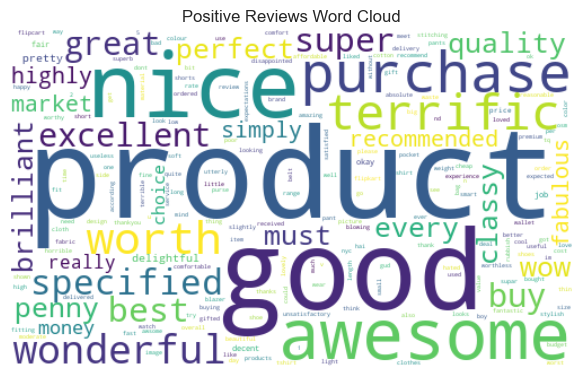

In [ ]:
# Generate word clouds
plt.figure(figsize=(16, 18))

# Positive reviews word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=500, height=300, background_color="white").generate_from_frequencies(pos_word_freq)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()


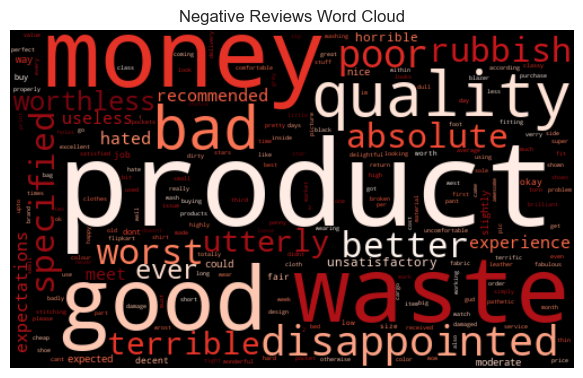

In [ ]:
# Generate word clouds
plt.figure(figsize=(16, 18))

# Negative reviews word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate_from_frequencies(neg_word_freq)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud")
plt.show()

In [ ]:
def preprocess_text(text):
    if isinstance(text, list):  # Convert list to string if needed
        text = ' '.join(text)
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
        tokens = text.split()
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)
    return ""


In [ ]:
print(flipkart_data['Review'].head())  # See if it contains lists or strings
print(type(flipkart_data['Review'].iloc[0]))  # Check the data type of the first entry


0             super!
1            awesome
2               fair
3    useless product
4               fair
Name: Review, dtype: object
<class 'str'>


In [ ]:
flipkart_data['Review'] = flipkart_data['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [ ]:
flipkart_data['cleaned_review'] = flipkart_data['Review'].apply(preprocess_text)


In [ ]:
flipkart_data['processed_text']=flipkart_data['cleaned_review']

In [ ]:
vectorizer = TfidfVectorizer(max_features=20)  # Top 20 words
tfidf_matrix = vectorizer.fit_transform(flipkart_data['processed_text'])

tfidf_words = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.mean(axis=0).A1

tfidf_df = pd.DataFrame({'Word': tfidf_words, 'TF-IDF Score': tfidf_scores}).sort_values(by="TF-IDF Score", ascending=False)

print(tfidf_df.head(10))


In [ ]:
# Drop NaN values before vectorization
flipkart_data = flipkart_data.dropna(subset=['cleaned_review', 'Sentiment'])

In [ ]:
# Map Sentiment labels to 0 (Negative), 1 (Neutral), and 2 (Positive)
y = flipkart_data['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
X = TfidfVectorizer(max_features=5000).fit_transform(flipkart_data['cleaned_review'])

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Machine Learning Models
nb_model = MultinomialNB()
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
svm_model = SVC(kernel='linear', probability=True, decision_function_shape='ovr')
rf_model = RandomForestClassifier(n_estimators=100)


In [ ]:
# Train and Evaluate Naive Bayes
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

In [ ]:
# Train and Evaluate Logistic Regression
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)


In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'], 
            yticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()